### MNIST Dataset - Applying MLPClassifer for it.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
train_df = pd.read_csv("MNIST/mnist_train.csv")

In [4]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df = pd.read_csv("MNIST/mnist_test.csv")
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
X_Train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]


In [7]:
X_Train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [9]:
X_Test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

In [10]:
X_Test.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
y_test.head()

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [12]:
#Normalizing the values before applying the model
from sklearn.preprocessing import Normalizer
norm = Normalizer(norm="max")


In [13]:
norm.fit(X_Train)

Normalizer(norm='max')

In [14]:
X_Train_Transformed = norm.transform(X_Train)

In [15]:
X_Test_Transformed = norm.transform(X_Test)

In [16]:
X_Train_Transformed

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(60000, 784))

In [17]:
model = MLPClassifier(
    hidden_layer_sizes=(128,128),
    activation="tanh",
    solver="sgd",
    random_state=48,
    max_iter=5000,
    learning_rate_init=0.001,
    early_stopping=True,
    validation_fraction=0.1
)

In [18]:
model.fit(X_Train_Transformed,y_train)

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(128, 128), max_iter=5000, random_state=48,
              solver='sgd')

In [19]:
y_predict = model.predict(X_Test_Transformed)

In [20]:
y_predict

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [21]:
y_predict_check = pd.DataFrame(y_predict)
y_predict_check

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [22]:
#Plotting the curves and classification report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import(accuracy_score,classification_report,confusion_matrix,precision_recall_curve,auc,roc_curve)

In [23]:
precision = precision_score(y_true=y_test,y_pred=y_predict,average='macro')
recall = recall_score(y_true=y_test,y_pred=y_predict,average='macro')
f1 = f1_score(y_true=y_test,y_pred=y_predict,average='macro')
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1}")
print(f"Confusion Matrix : {confusion_matrix(y_true=y_test,y_pred=y_predict)}")

Precision : 0.9708498667717447
Recall : 0.9705170535614263
F1 Score : 0.9706295370935039
Confusion Matrix : [[ 966    0    1    1    0    3    4    1    3    1]
 [   0 1120    3    2    0    1    4    2    3    0]
 [   6    0 1004    5    2    0    4    5    6    0]
 [   0    0    5  988    0    3    0    7    4    3]
 [   0    0    4    0  955    0    5    2    2   14]
 [   8    1    0   14    3  849    6    1    7    3]
 [   7    3    2    2    2    4  933    0    5    0]
 [   2    5   11    2    1    0    0  996    4    7]
 [   5    1    3    8    3    3    6    6  939    0]
 [   5    6    1   10   14    3    0    7    4  959]]


In [24]:
print(classification_report(y_true=y_test,y_pred=y_predict))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [25]:
#Plotting ROC curve
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y=y_test,classes=np.unique(y_train))
y_scores = model.predict_proba(X=X_Test)

c:\Users\cd246\OneDrive\Desktop\JAMIA-PRAC\AIMLPrac\PiyushSem2\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [26]:
y_scores_df = pd.DataFrame(y_scores)
y_scores_df

,0,1,2,3,4,5,6,7,8,9
0,4.190570e-06,2.556224e-07,3.347969e-04,8.120241e-03,6.208538e-07,4.060692e-05,1.276221e-11,9.913927e-01,8.097556e-05,2.564674e-05
1,4.928950e-07,1.391479e-04,9.997602e-01,8.994257e-05,5.088947e-09,2.104795e-08,1.265424e-06,2.741244e-12,8.951265e-06,1.138289e-10
2,9.461808e-09,9.989218e-01,1.897750e-06,2.905627e-06,1.849492e-06,1.661127e-07,5.998976e-07,1.069845e-03,6.882109e-07,2.061141e-07
3,9.995953e-01,1.301096e-08,1.774201e-06,2.357728e-07,7.647816e-06,1.105227e-05,3.678250e-04,1.043199e-05,3.363484e-06,2.370206e-06
4,5.042802e-06,8.645718e-11,1.490147e-06,8.680875e-08,9.960741e-01,1.947627e-07,1.959442e-06,4.084341e-05,1.147164e-06,3.875099e-03
...,...,...,...,...,...,...,...,...,...,...
9995,5.903912e-06,1.798393e-04,9.738303e-01,2.593751e-02,2.324675e-09,1.757399e-06,1.966934e-07,6.901985e-06,3.755351e-05,2.111135e-08
9996,2.016778e-07,5.317641e-06,3.163960e-05,9.970903e-01,2.534983e-10,2.855634e-03,2.163777e-08,1.385242e-07,8.622876e-06,8.126466e-06
9997,1.414137e-08,1.244332e-08,1.129591e-08,8.977019e-07,9.997171e-01,2.200730e-06,2.193722e-07,2.584617e-04,2.056810e-06,1.904075e-05
9998,1.395184e-05,3.086976e-06,3.084063e-06,2.543641e-06,4.198539e-06,3.233976e-01,1.046839e-05,6.527504e-08,6.765650e-01,6.531933e-09


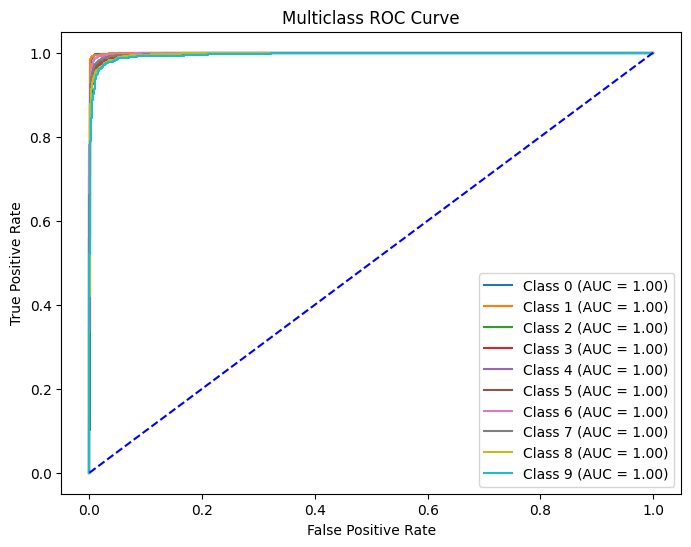

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr,tpr,_=roc_curve(y_test_bin[:,i],y_scores[:,i])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'Class {i} (AUC = {roc_auc:.2f})')
#Plotting diagonal line
plt.plot([0,1],[0,1],color='blue',linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")   

In [28]:
## Now applying cross validation 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

In [30]:
modelCV = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation="relu",
    max_iter=1500
)

In [ ]:
scoring=[
    'accuracy','precision_weighted','recall_weighted'
]
#scoring object are either passed as objects or dictinoaries

In [39]:
scorers = cross_validate(
    modelCV,
    X_Train_Transformed,
    y_train,
    scoring=scoring,
    cv=6,
    return_estimator=True,
    return_train_score=True,
    verbose=1
)

In [40]:
scorers_df = pd.DataFrame(scorers)
scorers_df.head()

,fit_time,score_time,estimator,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,148.135525,0.025984,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.9013,0.91482,0.901105,0.914729,0.9013,0.91482
1,66.368164,0.025783,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8965,0.91794,0.896333,0.917694,0.8965,0.91794
2,66.745190,0.020024,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8973,0.91516,0.897254,0.915274,0.8973,0.91516
3,91.090291,0.026955,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8939,0.91482,0.894102,0.914886,0.8939,0.91482
4,96.362316,0.025097,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8903,0.91570,0.890337,0.915544,0.8903,0.91570


In [41]:
best_model_idx = scorers_df['test_accuracy'].idxmax()

In [42]:
best_model_idx

5

In [43]:
scorers_df

,fit_time,score_time,estimator,test_accuracy,train_accuracy,test_precision_weighted,train_precision_weighted,test_recall_weighted,train_recall_weighted
0,148.135525,0.025984,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.9013,0.91482,0.901105,0.914729,0.9013,0.91482
1,66.368164,0.025783,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8965,0.91794,0.896333,0.917694,0.8965,0.91794
2,66.745190,0.020024,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8973,0.91516,0.897254,0.915274,0.8973,0.91516
3,91.090291,0.026955,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8939,0.91482,0.894102,0.914886,0.8939,0.91482
4,96.362316,0.025097,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.8903,0.91570,0.890337,0.915544,0.8903,0.91570
5,90.712179,0.034544,"MLPClassifier(hidden_layer_sizes=(5,), max_ite...",0.9086,0.91470,0.908304,0.914526,0.9086,0.91470


In [48]:
best_model = scorers_df.iloc[best_model_idx,2]

In [49]:
best_model

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1500)

In [50]:
y_predict_cv = best_model.predict(X=X_Test_Transformed)

In [51]:
y_predict_cv

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [52]:
precision = precision_score(y_true=y_test,y_pred=y_predict_cv,average='macro')
recall = recall_score(y_true=y_test,y_pred=y_predict_cv,average='macro')
f1 = f1_score(y_true=y_test,y_pred=y_predict_cv,average='macro')
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print(f"F1 Score : {f1}")
print(f"Confusion Matrix : {confusion_matrix(y_true=y_test,y_pred=y_predict_cv)}")

Precision : 0.900370255941046
Recall : 0.8996717171435333
F1 Score : 0.8995980044011456
Confusion Matrix : [[ 947    0    5    1    5    6    9    3    3    1]
 [   0 1106    5    4    2    2    3    1   12    0]
 [  18    5  928   18   10    3   15   13   21    1]
 [   0    2   34  893    4   39    0   13   19    6]
 [   3    5    6    0  908    0   12    8    6   34]
 [  20    4    8   74   18  719   12    0   28    9]
 [  21    3   12    1    9   15  890    0    7    0]
 [   4   12   17   10   11    0    0  937    0   37]
 [  10   23   13   27   17   44   14    9  798   19]
 [  10    5    1   11   62    8    0   13    9  890]]


In [53]:
print(f"Classification report : {classification_report(y_true=y_test,y_pred=y_predict_cv)}")

Classification report :               precision    recall  f1-score   support

           0       0.92      0.97      0.94       980
           1       0.95      0.97      0.96      1135
           2       0.90      0.90      0.90      1032
           3       0.86      0.88      0.87      1010
           4       0.87      0.92      0.90       982
           5       0.86      0.81      0.83       892
           6       0.93      0.93      0.93       958
           7       0.94      0.91      0.93      1028
           8       0.88      0.82      0.85       974
           9       0.89      0.88      0.89      1009

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [54]:
from sklearn.preprocessing import label_binarize
y_test_bin_cv = label_binarize(y=y_test,classes=np.unique(y_train))
y_scores_cv = model.predict_proba(X=X_Test)

c:\Users\cd246\OneDrive\Desktop\JAMIA-PRAC\AIMLPrac\PiyushSem2\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [55]:
y_scores_df_cv = pd.DataFrame(y_scores_cv)
y_scores_df_cv

,0,1,2,3,4,5,6,7,8,9
0,4.190570e-06,2.556224e-07,3.347969e-04,8.120241e-03,6.208538e-07,4.060692e-05,1.276221e-11,9.913927e-01,8.097556e-05,2.564674e-05
1,4.928950e-07,1.391479e-04,9.997602e-01,8.994257e-05,5.088947e-09,2.104795e-08,1.265424e-06,2.741244e-12,8.951265e-06,1.138289e-10
2,9.461808e-09,9.989218e-01,1.897750e-06,2.905627e-06,1.849492e-06,1.661127e-07,5.998976e-07,1.069845e-03,6.882109e-07,2.061141e-07
3,9.995953e-01,1.301096e-08,1.774201e-06,2.357728e-07,7.647816e-06,1.105227e-05,3.678250e-04,1.043199e-05,3.363484e-06,2.370206e-06
4,5.042802e-06,8.645718e-11,1.490147e-06,8.680875e-08,9.960741e-01,1.947627e-07,1.959442e-06,4.084341e-05,1.147164e-06,3.875099e-03
...,...,...,...,...,...,...,...,...,...,...
9995,5.903912e-06,1.798393e-04,9.738303e-01,2.593751e-02,2.324675e-09,1.757399e-06,1.966934e-07,6.901985e-06,3.755351e-05,2.111135e-08
9996,2.016778e-07,5.317641e-06,3.163960e-05,9.970903e-01,2.534983e-10,2.855634e-03,2.163777e-08,1.385242e-07,8.622876e-06,8.126466e-06
9997,1.414137e-08,1.244332e-08,1.129591e-08,8.977019e-07,9.997171e-01,2.200730e-06,2.193722e-07,2.584617e-04,2.056810e-06,1.904075e-05
9998,1.395184e-05,3.086976e-06,3.084063e-06,2.543641e-06,4.198539e-06,3.233976e-01,1.046839e-05,6.527504e-08,6.765650e-01,6.531933e-09


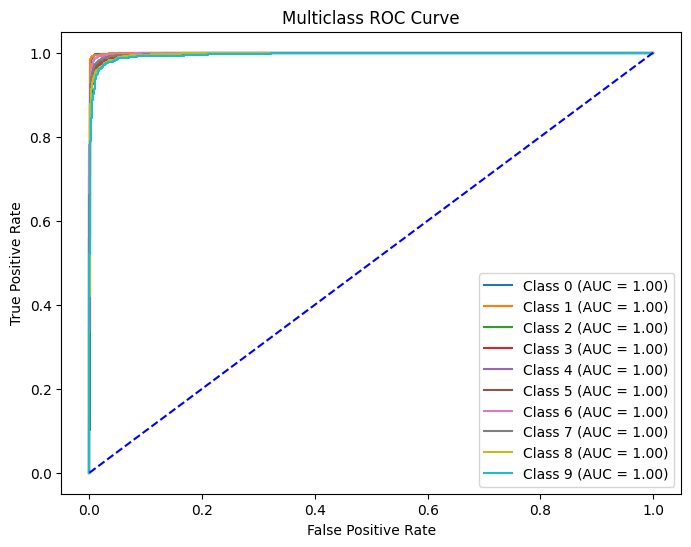

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc
n_classes = y_test_bin_cv.shape[1]
plt.figure(figsize=(8,6))
for i in range(n_classes):
    fpr,tpr,_=roc_curve(y_test_bin_cv[:,i],y_scores_cv[:,i])
    roc_auc = auc(fpr,tpr)
    plt.plot(fpr,tpr,label=f'Class {i} (AUC = {roc_auc:.2f})')
#Plotting diagonal line
plt.plot([0,1],[0,1],color='blue',linestyle='--') 
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")   